### Conclusion:

- 1.Audio version contribute 11.2% sales record but only contribte 5% sales contribute. In some way we should reduce audio sales investemnt
- 2.2000-05-25 revise contribute 50% sales revenue and some revise version is not success

### improvement

- 1.According to the time period to anaylsis different time which tpye(ebook/audio/print) have most significant sales performance and according to this data to design advertiesment and sales strategy

In [315]:
import pandas as pd
import numpy as np
import operator
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from functools import reduce
from scipy import stats


#statsmodels is used for evluation
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor   #use for eliminating mulitcollienrity

#we use sk-learn to built our model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import preprocessing   #use for 
from sklearn.linear_model import Lasso   #use for feature selection
from sklearn.decomposition import PCA   


In [ ]:
class FindZero:
    def __init__(self,dataframe):
        pass
    
    def 

### 3.Data Cleaning

In [3]:
df_1 = pd.read_csv("03_Data/05_Simon_sample_data.csv")

In [7]:
df_1.head()

,entity,formattype,fromdate,titlecount,titles,todate,author,amazontotalreviews,minappleprice,amazontotalrevenue,...,lumpedpreorderrevenue,amazonsoldunits,amazonpreordersubscriptionrevenue,preordersubscriptionunits,amazonpreordersalesrevenue,maxappleprice,pagelength,pricewassetbypublisher,barnesandnobledistributor,appledistributor
0,Alone in the dark,print,20170418,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170419,Frith Banbury,306.0,0,0,...,0,6,0,0,0,0,NaN,NaN,NaN,NaN
1,Alone in the dark,print,20170419,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170420,Frith Banbury,306.0,0,702,...,0,7,0,0,0,0,NaN,NaN,NaN,NaN
2,Alone in the dark,print,20170420,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170421,Frith Banbury,306.0,0,4914,...,0,7,0,0,0,0,NaN,NaN,NaN,NaN
3,Alone in the dark,print,20170421,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170422,Frith Banbury,306.0,0,4212,...,0,6,0,0,0,0,NaN,NaN,NaN,NaN
4,Alone in the dark,print,20170422,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170423,Frith Banbury,306.0,0,702,...,0,1,0,0,0,0,NaN,NaN,NaN,NaN


In [6]:
#we have too many colmuns filled with zero data, we should find them and temporarily remove them.
df_1.describe()

,fromdate,titlecount,todate,amazontotalreviews,minappleprice,amazontotalrevenue,accruedpreordersoldunits,amazonlumpedpreordersubscriptionrevenue,preordersalesrevenue,foundatamazon,...,preorderrevenue,pubtrackreported,lumpedpreorderrevenue,amazonsoldunits,amazonpreordersubscriptionrevenue,preordersubscriptionunits,amazonpreordersalesrevenue,maxappleprice,pagelength,pricewassetbypublisher
count,6.539000e+03,6539.000000,6.539000e+03,6522.000000,6539.000000,6539.000000,6539.000000,6539.0,6539.000000,6539.000000,...,6539.000000,6539.000000,6539.000000,6539.000000,6539.0,6539.0,6539.000000,6539.000000,2558.000000,1531.0
mean,2.018078e+07,1.599174,2.018080e+07,242.896044,118.859459,18074.906866,0.235204,0.0,155.503288,0.998165,...,155.503288,0.984095,155.503288,17.666004,0.0,0.0,155.503288,118.859459,336.532447,1.0
std,7.319859e+03,0.748654,7.321285e+03,57.042772,323.464108,30999.078107,2.776806,0.0,8769.366153,0.042803,...,8769.366153,0.125116,8769.366153,36.272170,0.0,0.0,8769.366153,323.464108,42.531144,0.0
min,2.017040e+07,1.000000,2.017040e+07,120.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,305.000000,1.0
25%,2.017121e+07,1.000000,2.017121e+07,200.000000,0.000000,1998.000000,0.000000,0.0,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,320.000000,1.0
50%,2.018071e+07,1.000000,2.018071e+07,250.000000,0.000000,7191.000000,0.000000,0.0,0.000000,1.000000,...,0.000000,1.000000,0.000000,6.000000,0.0,0.0,0.000000,0.000000,321.000000,1.0
75%,2.019013e+07,2.000000,2.019013e+07,283.000000,0.000000,17982.000000,0.000000,0.0,0.000000,1.000000,...,0.000000,1.000000,0.000000,13.000000,0.0,0.0,0.000000,0.000000,321.000000,1.0
max,2.019083e+07,4.000000,2.019083e+07,331.000000,999.000000,571692.000000,82.000000,0.0,501420.000000,1.000000,...,501420.000000,1.000000,501420.000000,781.000000,0.0,0.0,501420.000000,999.000000,496.000000,1.0


In [15]:
#find the columns have nan data, but we can't delete them, most of them is useful, we should find nan row and delete that row
l_2=df_1.columns[df_1.isna().any()].tolist()
print(l_2)

['amazontotalreviews', 'amazonaveragerating', 'amazoncategories', 'formats', 'pagelength', 'pricewassetbypublisher', 'barnesandnobledistributor', 'appledistributor']


In [103]:
#find the rows contained nan value and store them in l_3, according to their row index drop them
#some columns, like pagelenge have so many nan 
row_to_delete=[]
col_to_delete=[]
for i in range(0,len(l_2)):
    l_3=df_1[df_1[l_2[i]].isnull()]
    if len(l_3.index)< (0.1*len(df_1)):         
        row_to_delete.extend(l_3.index.values)
        print("for columns of",l_2[i])
        print("these rows are dropped by nan value:",l_3.index,len(l_3.index))
        print("*"*100)
    else:
        print("these columns didn't delete:",l_2[i])
        print("length of nan value of this column is", len(l_3.index))
        col_to_delete.append(l_2[i])

row_to_delete_unique = list(dict.fromkeys(row_to_delete))  #delete duplicate in list
print(row_to_delete)
#row_to_delete_unique= sum(row_to_delete,[])
#row_to_delete = np.unique(row_to_list)   
print(row_to_delete_unique)
print(type(row_to_delete_unique))
df_2=df_1.drop(row_to_delete_unique)
print(len(df_1))
print(len(df_2))

for columns of amazontotalreviews
these rows are dropped by nan value: Int64Index([1540, 1553, 1576, 1577, 1681, 4354, 4849, 4850, 4851, 4852, 4853,
            4854, 4855, 4856, 4857, 4858, 4859],
           dtype='int64') 17
****************************************************************************************************
for columns of amazonaveragerating
these rows are dropped by nan value: Int64Index([1540, 1553, 1576, 1577, 1681, 4849, 4850, 4851, 4852, 4853, 4854,
            4855, 4856, 4857, 4858, 4859],
           dtype='int64') 16
****************************************************************************************************
for columns of amazoncategories
these rows are dropped by nan value: Int64Index([1540, 1553, 1576, 1577, 1681], dtype='int64') 5
****************************************************************************************************
for columns of formats
these rows are dropped by nan value: Int64Index([5735], dtype='int64') 1
***********************

In [115]:
print(col_to_delete)
#Accroding to previous description, I think we can delete those columns due to nan value
df_3=df_2.drop(col_to_delete,axis=1)
print(df_1.shape)
print(df_2.shape)
print(df_3.shape)

['pagelength', 'pricewassetbypublisher', 'barnesandnobledistributor', 'appledistributor']
(6539, 106)
(6521, 106)
(6521, 102)


In [116]:
#thit setp, we drop any columns that have Nan values, we only need consistency valuse
df_4=df_3.dropna(axis=1,how='any') 
print(df_3.shape)
print(df_4.shape)

(6521, 102)
(6521, 102)


In [117]:
#check if we have still have null value in df_5
df_4.isnull().any()

entity                                     False
formattype                                 False
fromdate                                   False
titlecount                                 False
titles                                     False
todate                                     False
author                                     False
amazontotalreviews                         False
minappleprice                              False
amazontotalrevenue                         False
accruedpreordersoldunits                   False
amazonlumpedpreordersubscriptionrevenue    False
preordersalesrevenue                       False
foundatamazon                              False
barnesandnobleaccruedpreorderrevenue       False
amazonpreordersubscriptionunits            False
amazonlumpedpreordersalesrevenue           False
foundatbarnesandnoble                      False
maxprice                                   False
lumpedpreordersubscriptionunits            False
applepreorderrevenue

In [118]:
#every a few steps, we should save our new cleaned data into a new file, so next time we can read these cleaned dataset directly
export_csv = df_4.to_csv (r'03_Data/06_Simon_Clearn_4.csv',header=False) 

In [119]:
df_4.describe()

,fromdate,titlecount,todate,amazontotalreviews,minappleprice,amazontotalrevenue,accruedpreordersoldunits,amazonlumpedpreordersubscriptionrevenue,preordersalesrevenue,foundatamazon,...,accruedpreordersalesrevenue,maxbarnesandnobleprice,preorderrevenue,pubtrackreported,lumpedpreorderrevenue,amazonsoldunits,amazonpreordersubscriptionrevenue,preordersubscriptionunits,amazonpreordersalesrevenue,maxappleprice
count,6.521000e+03,6521.000000,6.521000e+03,6521.000000,6521.000000,6521.000000,6521.000000,6521.0,6521.000000,6521.0,...,6521.000000,6521.000000,6521.000000,6521.000000,6521.000000,6521.000000,6521.0,6521.0,6521.000000,6521.000000
mean,2.018080e+07,1.600521,2.018083e+07,242.913970,117.502377,18104.370802,0.235853,0.0,155.932526,1.0,...,183.068854,128.028523,155.932526,0.984052,155.932526,17.693912,0.0,0.0,155.932526,117.502377
std,7.310262e+03,0.748860,7.311626e+03,57.028772,321.860144,31036.224695,2.780609,0.0,8781.458952,0.0,...,2332.918673,316.974201,8781.458952,0.125286,8781.458952,36.317818,0.0,0.0,8781.458952,321.860144
min,2.017040e+07,1.000000,2.017040e+07,120.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
25%,2.017121e+07,1.000000,2.017121e+07,200.000000,0.000000,1998.000000,0.000000,0.0,0.000000,1.0,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000
50%,2.018071e+07,1.000000,2.018071e+07,250.000000,0.000000,7191.000000,0.000000,0.0,0.000000,1.0,...,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000,0.0,0.0,0.000000,0.000000
75%,2.019013e+07,2.000000,2.019013e+07,283.000000,0.000000,17982.000000,0.000000,0.0,0.000000,1.0,...,0.000000,0.000000,0.000000,1.000000,0.000000,13.000000,0.0,0.0,0.000000,0.000000
max,2.019083e+07,4.000000,2.019083e+07,331.000000,999.000000,571692.000000,82.000000,0.0,501420.000000,1.0,...,88478.000000,999.000000,501420.000000,1.000000,501420.000000,781.000000,0.0,0.0,501420.000000,999.000000


In [120]:
#To "delete" the zero-columns, reassign df_5:
df_5 = df_4.loc[:, (df_4 != 0).any(axis=0)]
print(df_4.shape)
print(df_5.shape)

(6521, 102)
(6521, 73)


In [121]:
df_5.describe()

,fromdate,titlecount,todate,amazontotalreviews,minappleprice,amazontotalrevenue,accruedpreordersoldunits,preordersalesrevenue,foundatamazon,amazonlumpedpreordersalesrevenue,...,foundatapple,minbarnesandnobleprice,accruedpreordersalesrevenue,maxbarnesandnobleprice,preorderrevenue,pubtrackreported,lumpedpreorderrevenue,amazonsoldunits,amazonpreordersalesrevenue,maxappleprice
count,6.521000e+03,6521.000000,6.521000e+03,6521.000000,6521.000000,6521.000000,6521.000000,6521.000000,6521.0,6521.000000,...,6521.000000,6521.000000,6521.000000,6521.000000,6521.000000,6521.000000,6521.000000,6521.000000,6521.000000,6521.000000
mean,2.018080e+07,1.600521,2.018083e+07,242.913970,117.502377,18104.370802,0.235853,155.932526,1.0,155.932526,...,0.115933,128.028523,183.068854,128.028523,155.932526,0.984052,155.932526,17.693912,155.932526,117.502377
std,7.310262e+03,0.748860,7.311626e+03,57.028772,321.860144,31036.224695,2.780609,8781.458952,0.0,8781.458952,...,0.320169,316.974201,2332.918673,316.974201,8781.458952,0.125286,8781.458952,36.317818,8781.458952,321.860144
min,2.017040e+07,1.000000,2.017040e+07,120.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.017121e+07,1.000000,2.017121e+07,200.000000,0.000000,1998.000000,0.000000,0.000000,1.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,2.018071e+07,1.000000,2.018071e+07,250.000000,0.000000,7191.000000,0.000000,0.000000,1.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000
75%,2.019013e+07,2.000000,2.019013e+07,283.000000,0.000000,17982.000000,0.000000,0.000000,1.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,13.000000,0.000000,0.000000
max,2.019083e+07,4.000000,2.019083e+07,331.000000,999.000000,571692.000000,82.000000,501420.000000,1.0,501420.000000,...,1.000000,999.000000,88478.000000,999.000000,501420.000000,1.000000,501420.000000,781.000000,501420.000000,999.000000


<font size='5' color='red'>In here,we can change threshold to get more data, but for more convenient data manipulation, i raise the number to 0.5</font>

In [136]:
# Max number of zeros in a row
threshold = len(df_5)*0.25
print(threshold)

# 1. transform the column to boolean is_zero
# 2. calculate the cumulative sum to get the number of cumulative 0
# 3. Check how much of each count you get and remove 0 counts
# 4. Get the maximum number of cumulative zeros
# 5. Drop the columns with more than your threshold

col_to_remove = []
for col in df_5.columns:
    count_zeros = (df_5[col] == 0).cumsum().value_counts()
    if len(count_zeros) and count_zeros.idxmax() > threshold:
        col_to_remove.append(col)

print(col_to_remove)
df_6 = df_5.drop(col_to_remove, axis=1)
print(df_5.shape)
print(df_6.shape)

1630.25
['minappleprice', 'accruedpreordersoldunits', 'preordersalesrevenue', 'amazonlumpedpreordersalesrevenue', 'foundatbarnesandnoble', 'preorderunits', 'amazonsubscriptionrevenue', 'amazonlumpedpreorderrevenue', 'barnesandnoblesoldunits', 'applesoldunits', 'preorderperiod', 'lumpedpreordersoldunits', 'accruedpreorderrevenue', 'amazonaccruedpreorderrevenue', 'amazonaccruedpreorderunits', 'applesalesrevenue', 'preordersoldunits', 'lumpedpreordersalesrevenue', 'amazonlumpedpreordersoldunits', 'accruedpreorderunits', 'barnesandnoblesalesrevenue', 'amazonaccruedpreordersalesrevenue', 'amazonlumpedpreorderunits', 'subscriptionunits', 'amazonpreorderunits', 'amazonpreorderrevenue', 'amazonaccruedpreordersoldunits', 'amazonpreordersoldunits', 'lumpedpreorderunits', 'subscriptionrevenue', 'amazonsubscriptionunits', 'foundatapple', 'accruedpreordersalesrevenue', 'preorderrevenue', 'lumpedpreorderrevenue', 'amazonpreordersalesrevenue', 'maxappleprice']
(6521, 73)
(6521, 36)


In [137]:
df_6.describe()

,fromdate,titlecount,todate,amazontotalreviews,amazontotalrevenue,foundatamazon,maxprice,amazontotalunits,totalrevenue,maxlistprice,...,amazonsalesrevenue,minlistprice,minamazonprice,salesrevenue,soldunits,aapreported,minbarnesandnobleprice,maxbarnesandnobleprice,pubtrackreported,amazonsoldunits
count,6.521000e+03,6521.000000,6.521000e+03,6521.000000,6521.000000,6521.0,6521.000000,6521.000000,6521.000000,6521.000000,...,6521.000000,6521.000000,6521.000000,6521.000000,6521.000000,6521.000000,6521.000000,6521.000000,6521.000000,6521.000000
mean,2.018080e+07,1.600521,2.018083e+07,242.913970,18104.370802,1.0,1120.559730,19.278178,19061.547922,815.473700,...,15735.892808,672.586413,1071.367735,16693.069928,18.652047,0.984052,128.028523,128.028523,0.984052,17.693912
std,7.310262e+03,0.748860,7.311626e+03,57.028772,31036.224695,0.0,480.697638,36.612092,32740.680051,716.854059,...,29273.489611,735.826295,512.549629,31147.662548,37.802387,0.125286,316.974201,316.974201,0.125286,36.317818
min,2.017040e+07,1.000000,2.017040e+07,120.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.017121e+07,1.000000,2.017121e+07,200.000000,1998.000000,1.0,799.000000,2.000000,1998.000000,0.000000,...,1795.000000,0.000000,732.000000,1795.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
50%,2.018071e+07,1.000000,2.018071e+07,250.000000,7191.000000,1.0,999.000000,7.000000,7656.000000,799.000000,...,6392.000000,637.000000,999.000000,6800.000000,7.000000,1.000000,0.000000,0.000000,1.000000,6.000000
75%,2.019013e+07,2.000000,2.019013e+07,283.000000,17982.000000,1.0,1595.000000,16.000000,20035.000000,1458.000000,...,14382.000000,1357.000000,1579.000000,15950.000000,14.000000,1.000000,0.000000,0.000000,1.000000,13.000000
max,2.019083e+07,4.000000,2.019083e+07,331.000000,571692.000000,1.0,3499.000000,781.000000,571692.000000,3499.000000,...,571692.000000,3499.000000,3499.000000,571692.000000,781.000000,1.000000,999.000000,999.000000,1.000000,781.000000


In [140]:
export_csv = df_6.to_csv (r'03_Data/07_Simon_Clearn_6.csv',header=True) 

In [142]:
df_6=pd.read_csv("03_Data/07_Simon_Clearn_6.csv")

In [143]:
df_6.columns

Index(['Unnamed: 0', 'entity', 'formattype', 'fromdate', 'titlecount',
       'titles', 'todate', 'author', 'amazontotalreviews',
       'amazontotalrevenue', 'foundatamazon', 'maxprice', 'amazontotalunits',
       'totalrevenue', 'maxlistprice', 'minamazonlistprice', 'minprice',
       'bookscanreported', 'datepublished', 'maxamazonlistprice', 'totalunits',
       'maxamazonprice', 'amazonaveragerating', 'publishertype',
       'amazonsalesrevenue', 'amazoncategories', 'minlistprice',
       'minamazonprice', 'publisherparent', 'salesrevenue', 'formats',
       'soldunits', 'aapreported', 'minbarnesandnobleprice',
       'maxbarnesandnobleprice', 'pubtrackreported', 'amazonsoldunits'],
      dtype='object')

<br>

<br>

### 4.EDA Data

In [154]:
gb_1= df_6.groupby(['entity']).sum()

In [155]:
gb_1

,Unnamed: 0,fromdate,titlecount,todate,amazontotalreviews,amazontotalrevenue,foundatamazon,maxprice,amazontotalunits,totalrevenue,...,amazonsalesrevenue,minlistprice,minamazonprice,salesrevenue,soldunits,aapreported,minbarnesandnobleprice,maxbarnesandnobleprice,pubtrackreported,amazonsoldunits
entity,,,,,,,,,,,,,,,,,,,,,
Alone in the dark,4611353,61249321607,4935,61249392431,875379.0,10280820,3035,2983674,12210,10280820,...,9246280,1877023,2900153,9246280,11518,3023,360349,360349,3023,11518
The Walking Dead,16693228,70349690452,5502,70349780996,708663.0,107777782,3486,4323496,113503,114019534,...,93367477,2508913,4086236,99609229,110112,3394,474525,474525,3394,103864


In [160]:
#according to groupby, we split data into two parts AD and WD
df_6_AD = df_6[df_6['entity']=='Alone in the dark']

In [164]:
print(df_6_AD.shape)
df_6_AD.head()


(3035, 37)


,Unnamed: 0,entity,formattype,fromdate,titlecount,titles,todate,author,amazontotalreviews,amazontotalrevenue,...,minamazonprice,publisherparent,salesrevenue,formats,soldunits,aapreported,minbarnesandnobleprice,maxbarnesandnobleprice,pubtrackreported,amazonsoldunits
0,0,Alone in the dark,print,20170418,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170419,Frith Banbury,306.0,0,...,0,Simon & Schuster,0,Audio CD,6,1,0,0,1,6
1,1,Alone in the dark,print,20170419,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170420,Frith Banbury,306.0,702,...,0,Simon & Schuster,702,Audio CD,7,1,0,0,1,7
2,2,Alone in the dark,print,20170420,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170421,Frith Banbury,306.0,4914,...,702,Simon & Schuster,4914,Audio CD,7,1,0,0,1,7
3,3,Alone in the dark,print,20170421,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170422,Frith Banbury,306.0,4212,...,702,Simon & Schuster,4212,Audio CD,6,1,0,0,1,6
4,4,Alone in the dark,print,20170422,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170423,Frith Banbury,306.0,702,...,702,Simon & Schuster,702,Audio CD,1,1,0,0,1,1


In [165]:
df_6_WD = df_6[df_6['entity']=='The Walking Dead']

In [186]:
df_6_WD.columns

Index(['Unnamed: 0', 'entity', 'formattype', 'fromdate', 'titlecount',
       'titles', 'todate', 'author', 'amazontotalreviews',
       'amazontotalrevenue', 'foundatamazon', 'maxprice', 'amazontotalunits',
       'totalrevenue', 'maxlistprice', 'minamazonlistprice', 'minprice',
       'bookscanreported', 'datepublished', 'maxamazonlistprice', 'totalunits',
       'maxamazonprice', 'amazonaveragerating', 'publishertype',
       'amazonsalesrevenue', 'amazoncategories', 'minlistprice',
       'minamazonprice', 'publisherparent', 'salesrevenue', 'formats',
       'soldunits', 'aapreported', 'minbarnesandnobleprice',
       'maxbarnesandnobleprice', 'pubtrackreported', 'amazonsoldunits'],
      dtype='object')

In [194]:
count_1 = df_6_AD.groupby("formattype").count()

In [211]:
print(count_1)
print(count_1.iloc[:,0])
print(count_1.index)

            Unnamed: 0  entity  fromdate  titlecount  titles  todate  author  \
formattype                                                                     
audio              621     621       621         621     621     621     621   
ebook              882     882       882         882     882     882     882   
print             1532    1532      1532        1532    1532    1532    1532   

            amazontotalreviews  amazontotalrevenue  foundatamazon  ...  \
formattype                                                         ...   
audio                      621                 621            621  ...   
ebook                      882                 882            882  ...   
print                     1532                1532           1532  ...   

            minamazonprice  publisherparent  salesrevenue  formats  soldunits  \
formattype                                                                      
audio                  621              621           621      621

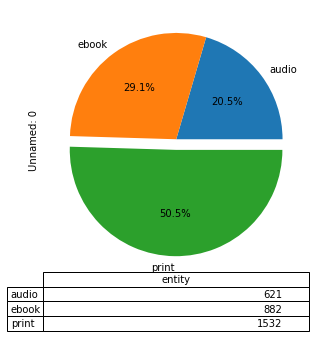

In [249]:
    # using data total)arrests
count_1.iloc[:,0].plot(
    #count_1.iloc[:,0],
    # with the labels being officer names
    #labels=count_1.index,
    #title=count_1.iloc[:,1],
    kind='pie',
    table=count_1.iloc[:,1],
    # with no shadows
    #shadow=False,
    # with colors
    #colors=colors,
    # with one slide exploded out
    explode=(0, 0, 0.10),
    # with the start angle at 90%
    #startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    #x=count_1.iloc[:,1],
)

# View the plot drop above
#plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()

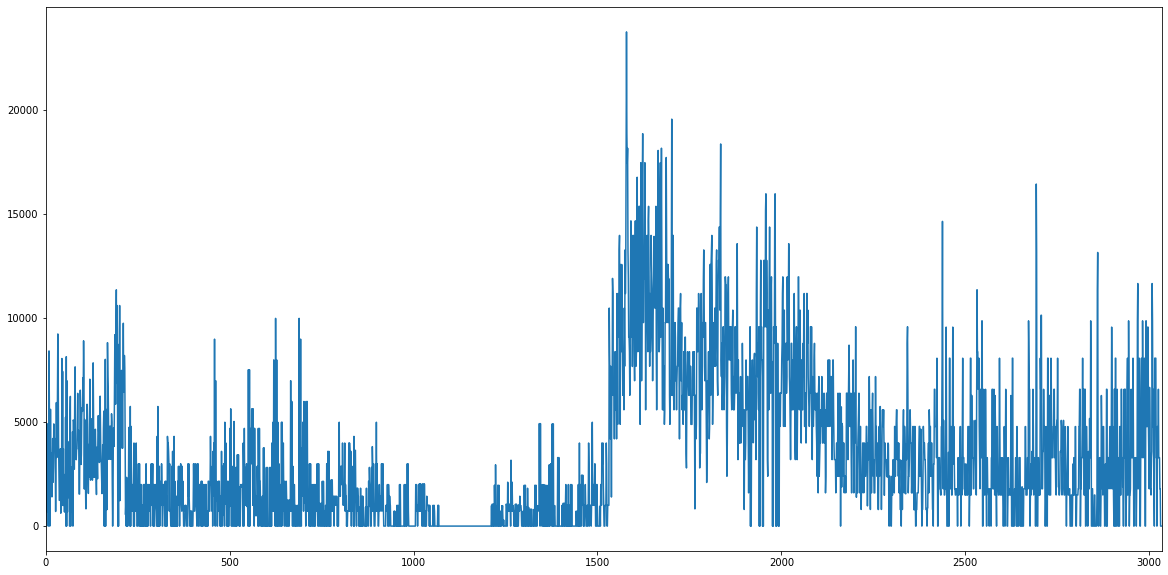

In [269]:
df_6_AD['totalrevenue'].plot(
    kind='line',
    figsize=(20,10)    
)

In [289]:
df_6_AD['Time'] = pd.to_datetime(df_6_AD['fromdate'],format='%Y%m%d')

#df_6_AD[['fromdate']].to_datatime()

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<font size='5' color='red'>For this type of data,we should use time series to analysis sales period influence to salesrevenue but i have not learn Time series yet, so i only use simple linear regression to test features relationship</font>

In [292]:
#set time as my new index
df_7_AD=df_6[df_6['entity']=='Alone in the dark']
df_7_AD.index=df_6_AD['Time']

In [293]:
df_7_AD

,Unnamed: 0,entity,formattype,fromdate,titlecount,titles,todate,author,amazontotalreviews,amazontotalrevenue,...,minamazonprice,publisherparent,salesrevenue,formats,soldunits,aapreported,minbarnesandnobleprice,maxbarnesandnobleprice,pubtrackreported,amazonsoldunits
Time,,,,,,,,,,,,,,,,,,,,,
2017-04-18,0,Alone in the dark,print,20170418,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170419,Frith Banbury,306.0,0,...,0,Simon & Schuster,0,Audio CD,6,1,0,0,1,6
2017-04-19,1,Alone in the dark,print,20170419,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170420,Frith Banbury,306.0,702,...,0,Simon & Schuster,702,Audio CD,7,1,0,0,1,7
2017-04-20,2,Alone in the dark,print,20170420,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170421,Frith Banbury,306.0,4914,...,702,Simon & Schuster,4914,Audio CD,7,1,0,0,1,7
2017-04-21,3,Alone in the dark,print,20170421,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170422,Frith Banbury,306.0,4212,...,702,Simon & Schuster,4212,Audio CD,6,1,0,0,1,6
2017-04-22,4,Alone in the dark,print,20170422,1,"{'amazontotalreviews': 306, 'minappleprice': 0...",20170423,Frith Banbury,306.0,702,...,702,Simon & Schuster,702,Audio CD,1,1,0,0,1,1
2017-04-23,5,Alone in the dark,print,20170423,1,"{'amazontotalreviews': 307, 'minappleprice': 0...",20170424,Frith Banbury,307.0,4914,...,702,Simon & Schuster,4914,Audio CD,7,1,0,0,1,7
2017-04-24,6,Alone in the dark,print,20170424,1,"{'amazontotalreviews': 307, 'minappleprice': 0...",20170425,Frith Banbury,307.0,4212,...,702,Simon & Schuster,4212,Audio CD,6,1,0,0,1,6
2017-04-25,7,Alone in the dark,print,20170425,1,"{'amazontotalreviews': 307, 'minappleprice': 0...",20170426,Frith Banbury,307.0,0,...,702,Simon & Schuster,0,Audio CD,0,1,0,0,1,0
2017-04-26,8,Alone in the dark,print,20170426,1,"{'amazontotalreviews': 307, 'minappleprice': 0...",20170427,Frith Banbury,307.0,2808,...,702,Simon & Schuster,2808,Audio CD,4,1,0,0,1,4


In [297]:
df_7_AD=df_7_AD.drop('Unnamed: 0',axis =1)

In [298]:
#double check again and replace NULL value with nan
df_7_AD.replace([np.inf, -np.inf], np.nan)
df_7_AD=df_7_AD.replace("inf","nan")
df_7_AD=df_7_AD.replace("..","nan")
df_7_AD.isnull().any()

entity                    False
formattype                False
fromdate                  False
titlecount                False
titles                    False
todate                    False
author                    False
amazontotalreviews        False
amazontotalrevenue        False
foundatamazon             False
maxprice                  False
amazontotalunits          False
totalrevenue              False
maxlistprice              False
minamazonlistprice        False
minprice                  False
bookscanreported          False
datepublished             False
maxamazonlistprice        False
totalunits                False
maxamazonprice            False
amazonaveragerating       False
publishertype             False
amazonsalesrevenue        False
amazoncategories          False
minlistprice              False
minamazonprice            False
publisherparent           False
salesrevenue              False
formats                   False
soldunits                 False
aaprepor

In [299]:
export_csv = df_7_AD.to_csv (r'03_Data/07_Simon_AD_Clearn_7.csv',header=False) 

In [ ]:
df_7_AD=df_7_AD.drop('foundatamazon',axis =1)

In [308]:
df_7_AD=df_7_AD.drop('fromdate',axis=1)

In [309]:
df_7_AD=df_7_AD.drop('todate',axis=1)

In [312]:
df_7_AD=df_7_AD.drop(['amazontotalrevenue','amazonsalesrevenue','totalrevenue','amazonsoldunits'],axis=1)

In [313]:
corr=df_7_AD.corr()
corr

,titlecount,amazontotalreviews,maxprice,amazontotalunits,maxlistprice,minamazonlistprice,minprice,bookscanreported,maxamazonlistprice,totalunits,maxamazonprice,amazonaveragerating,minlistprice,minamazonprice,salesrevenue,soldunits,aapreported,minbarnesandnobleprice,maxbarnesandnobleprice,pubtrackreported
titlecount,1.000000,-0.243762,-0.314117,-0.406380,-0.206888,-0.190217,-0.304917,0.701401,-0.206888,-0.406380,-0.297291,0.101429,-0.109694,-0.304917,-0.401262,-0.366543,-0.167522,-0.292832,-0.292832,-0.167522
amazontotalreviews,-0.243762,1.000000,0.058025,0.285422,0.324501,0.340391,0.052930,-0.078938,0.324501,0.285422,0.038520,-0.092834,0.218936,0.052930,0.261778,0.279300,0.017713,0.306048,0.306048,0.017713
maxprice,-0.314117,0.058025,1.000000,-0.151194,0.767215,0.714383,0.974578,-0.457922,0.767215,-0.151194,0.997836,0.061212,0.726824,0.974578,-0.112253,-0.228059,0.106303,-0.160122,-0.160122,0.106303
amazontotalunits,-0.406380,0.285422,-0.151194,1.000000,-0.137054,-0.129206,-0.172324,-0.440279,-0.137054,1.000000,-0.186089,-0.222041,-0.324402,-0.172324,0.983969,0.991170,0.052831,0.685151,0.685151,0.052831
maxlistprice,-0.206888,0.324501,0.767215,-0.137054,1.000000,0.940637,0.742366,-0.234950,1.000000,-0.137054,0.758751,-0.011747,0.895422,0.742366,-0.133815,-0.206808,0.051185,-0.133621,-0.133621,0.051185
minamazonlistprice,-0.190217,0.340391,0.714383,-0.129206,0.940637,1.000000,0.718296,-0.206760,0.940637,-0.129206,0.705283,-0.011988,0.946529,0.718296,-0.125165,-0.193999,0.047553,-0.126935,-0.126935,0.047553
minprice,-0.304917,0.052930,0.974578,-0.172324,0.742366,0.718296,1.000000,-0.434859,0.742366,-0.172324,0.976061,0.075055,0.744111,1.000000,-0.124748,-0.248280,0.098938,-0.192414,-0.192414,0.098938
bookscanreported,0.701401,-0.078938,-0.457922,-0.440279,-0.234950,-0.206760,-0.434859,1.000000,-0.234950,-0.440279,-0.434312,0.116854,-0.096519,-0.434859,-0.449673,-0.386704,-0.062405,-0.421786,-0.421786,-0.062405
maxamazonlistprice,-0.206888,0.324501,0.767215,-0.137054,1.000000,0.940637,0.742366,-0.234950,1.000000,-0.137054,0.758751,-0.011747,0.895422,0.742366,-0.133815,-0.206808,0.051185,-0.133621,-0.133621,0.051185
totalunits,-0.406380,0.285422,-0.151194,1.000000,-0.137054,-0.129206,-0.172324,-0.440279,-0.137054,1.000000,-0.186089,-0.222041,-0.324402,-0.172324,0.983969,0.991170,0.052831,0.685151,0.685151,0.052831


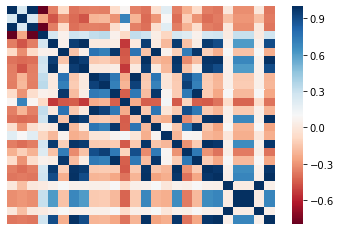

In [303]:
#plot a heatmap to find out the highly correatled variables
sns.heatmap(corr,xticklabels=False, yticklabels=False,cmap='RdBu')

In [316]:
#add constant for linear regression preareation
df_8_AD=sm.tools.add_constant(df_7_AD)

d:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [322]:
df_9_AD=df_8_AD.drop('salesrevenue',axis=1)
df_9_AD.insert(0,"salesrevenue",df_8_AD["salesrevenue"])

In [324]:
df_9_AD=df_9_AD.drop('const',axis=1)

In [325]:
df_9_AD=sm.tools.add_constant(df_9_AD)

In [329]:
df_9_AD=df_9_AD.drop(['entity','titles','author','amazoncategories','publisherparent'],axis=1)

In [331]:
df_9_AD.head()

,const,salesrevenue,formattype,titlecount,amazontotalreviews,maxprice,amazontotalunits,maxlistprice,minamazonlistprice,minprice,...,amazonaveragerating,publishertype,minlistprice,minamazonprice,formats,soldunits,aapreported,minbarnesandnobleprice,maxbarnesandnobleprice,pubtrackreported
Time,,,,,,,,,,,,,,,,,,,,,
2017-04-18,1.0,0,print,1,306.0,0,6,0,0,0,...,410.0,bigfive,0,0,Audio CD,6,1,0,0,1
2017-04-19,1.0,702,print,1,306.0,702,7,702,0,0,...,410.0,bigfive,0,0,Audio CD,7,1,0,0,1
2017-04-20,1.0,4914,print,1,306.0,702,7,702,702,702,...,410.0,bigfive,702,702,Audio CD,7,1,0,0,1
2017-04-21,1.0,4212,print,1,306.0,702,6,702,702,702,...,410.0,bigfive,702,702,Audio CD,6,1,0,0,1
2017-04-22,1.0,702,print,1,306.0,702,1,702,702,702,...,410.0,bigfive,702,702,Audio CD,1,1,0,0,1


In [332]:
export_csv = df_9_AD.to_csv (r'03_Data/09_Simon_Clearn_9.csv',header=True) 

In [349]:
df_10_AD.columns

Index(['const', 'salesrevenue', 'titlecount', 'amazontotalreviews', 'maxprice',
       'amazontotalunits', 'maxlistprice', 'minamazonlistprice', 'minprice',
       'bookscanreported', 'datepublished', 'maxamazonlistprice', 'totalunits',
       'maxamazonprice', 'amazonaveragerating', 'minlistprice',
       'minamazonprice', 'soldunits', 'aapreported', 'minbarnesandnobleprice',
       'maxbarnesandnobleprice', 'pubtrackreported'],
      dtype='object')

In [351]:
df_10_AD.datepublished

Time
2017-04-18    2009-05-12
2017-04-19    2009-05-12
2017-04-20    2009-05-12
2017-04-21    2009-05-12
2017-04-22    2009-05-12
2017-04-23    2009-05-12
2017-04-24    2009-05-12
2017-04-25    2009-05-12
2017-04-26    2009-05-12
2017-04-27    2009-05-12
2017-04-28    2009-05-12
2017-04-29    2009-05-12
2017-04-30    2009-05-12
2017-05-01    2009-05-12
2017-05-02    2009-05-12
2017-05-03    2009-05-12
2017-05-04    2009-05-12
2017-05-05    2009-05-12
2017-05-06    2009-05-12
2017-05-07    2009-05-12
2017-05-08    2009-05-12
2017-05-09    2009-05-12
2017-05-10    2009-05-12
2017-05-11    2009-05-12
2017-05-12    2009-05-12
2017-05-13    2009-05-12
2017-05-14    2009-05-12
2017-05-15    2009-05-12
2017-05-20    2009-05-12
2017-05-21    2009-05-12
                 ...    
2019-07-28    2012-12-11
2019-07-29    2012-12-11
2019-07-30    2012-12-11
2019-07-31    2012-12-11
2019-08-01    2012-12-11
2019-08-02    2012-12-11
2019-08-03    2012-12-11
2019-08-04    2012-12-11
2019-08-05    2012-1

In [354]:
drop_col=['datepublished']

In [355]:
df_10_AD=df_10_AD.drop(drop_col,axis=1)

d:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:100: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])
d:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom == top == 1.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
d:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left == right == 1.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
d:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:123: RuntimeWarning: invalid value encountered in true_divide
  adj = (locs - lim1[0]) / (lim1[1] - lim1[0])


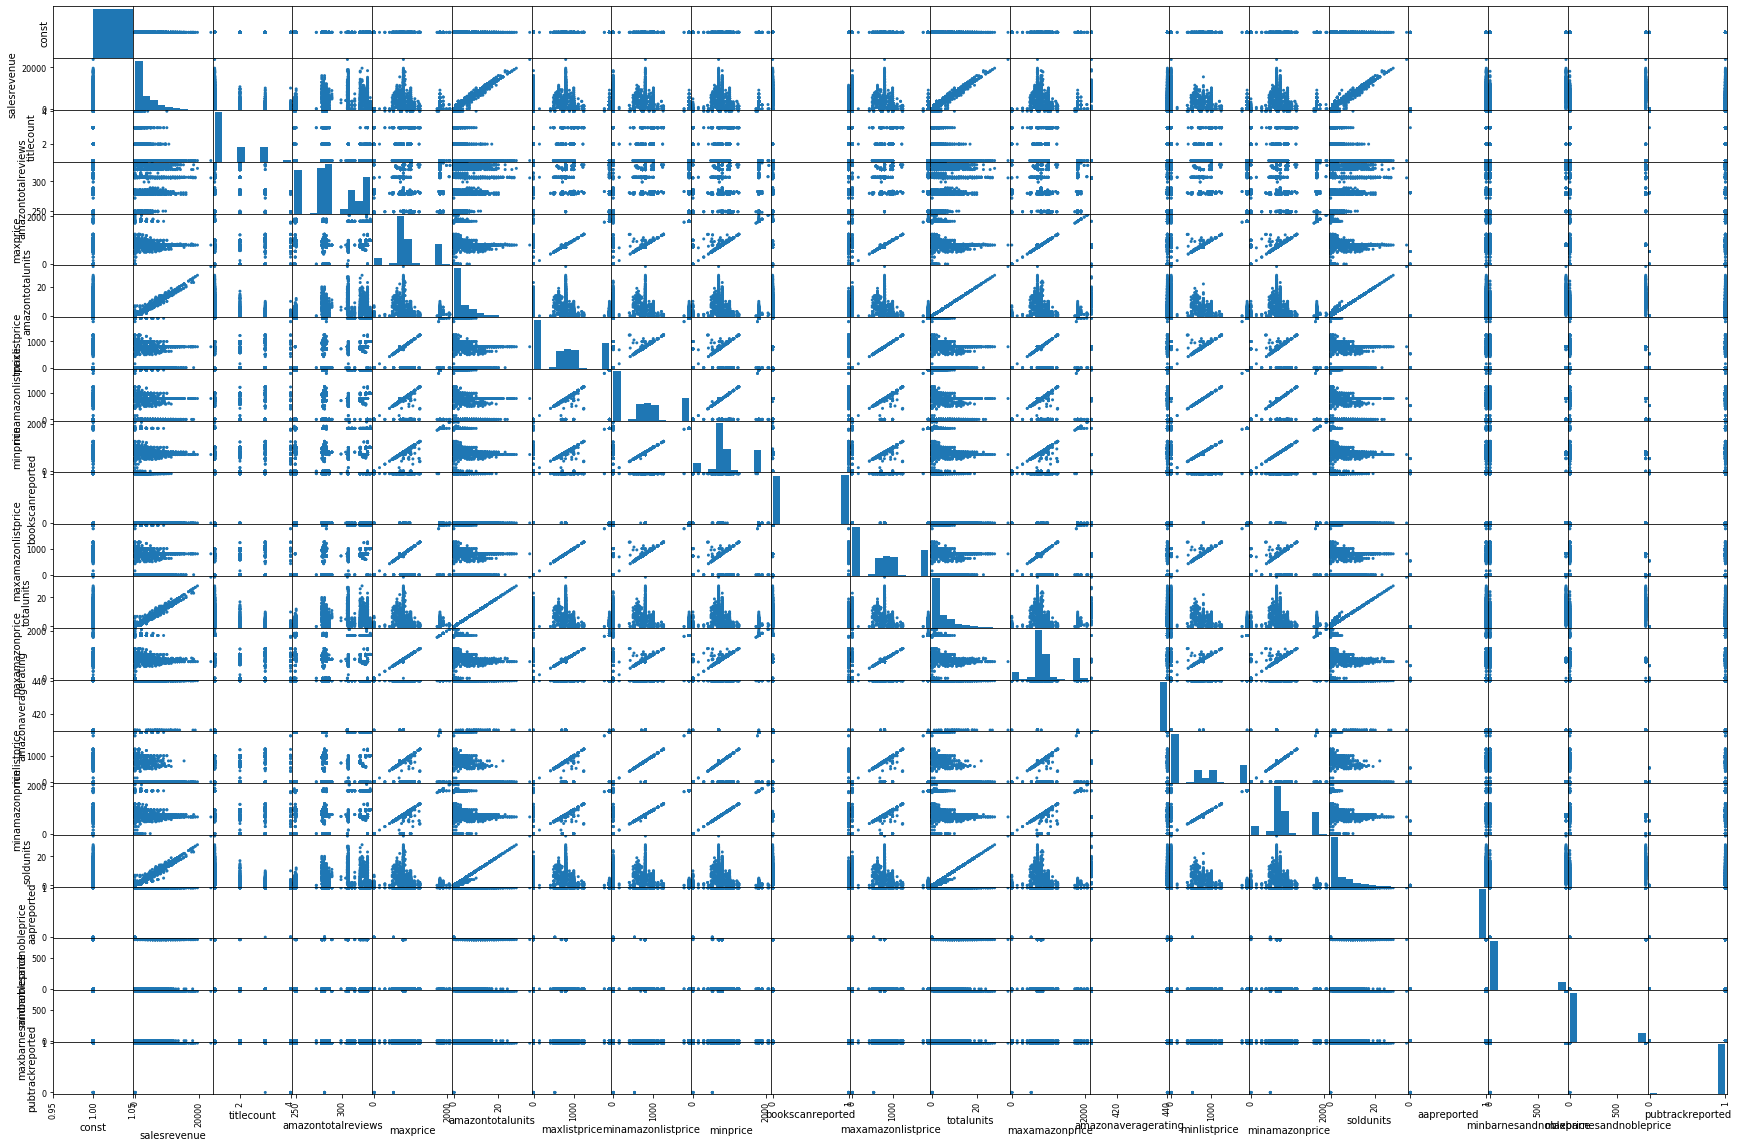

In [333]:
pd.plotting.scatter_matrix(df_9_AD,alpha=1,figsize=(30,20))
plt.show()

In [356]:
#define our input variable and our output variable
X = df_10_AD.drop('salesrevenue',axis=1)
Y = df_10_AD[['salesrevenue']]


#split dataset into training and testing portiona
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

#create an instance of our model
regression_model = LinearRegression()




# standardization before fitting data so that they have 0-mean and unit-variance: z = (x - u) / s
scaler = preprocessing.StandardScaler().fit(X_train)
x_train_s = scaler.transform(X_train)
x_test_s = scaler.transform(X_test)


#fit the model
regression_model.fit(x_train_s,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [357]:
#get multiple predictions
y_predict =regression_model.predict(x_test_s)

#show predict
y_predict

array([[ 4.36833188e+03],
       [-4.31038886e+02],
       [ 4.50909738e+03],
       [ 8.92322323e+02],
       [ 7.44969963e+02],
       [ 1.06391510e+04],
       [ 8.93234555e+01],
       [ 1.16387804e+04],
       [ 3.12670245e+03],
       [ 1.09438845e+04],
       [ 8.92322323e+02],
       [ 7.32750091e+02],
       [ 7.32750091e+02],
       [ 9.92367201e+02],
       [ 4.45578908e+02],
       [ 5.72528014e+02],
       [ 1.53339193e+03],
       [ 1.28752962e+03],
       [ 1.04707768e+03],
       [ 1.75310764e+03],
       [ 6.30984611e+03],
       [ 1.78293522e+03],
       [ 2.93047399e+02],
       [-4.34586947e+02],
       [ 7.11459873e+03],
       [ 7.56712110e+03],
       [ 7.82301493e+02],
       [ 3.20677691e+03],
       [ 2.42551585e+02],
       [ 7.32107775e+03],
       [ 8.61088330e+02],
       [ 2.38384657e+03],
       [ 4.20482972e+03],
       [ 8.43353737e+02],
       [ 2.38502926e+03],
       [-2.93148023e+02],
       [ 6.06024323e+03],
       [ 2.10055442e+03],
       [ 4.0

In [358]:
Y_test

,salesrevenue
Time,
2017-04-24,4212
2019-02-24,0
2017-07-15,5694
2018-11-01,999
2017-12-30,999
2018-09-17,11186
2018-09-21,0
2018-02-27,11985
2018-05-15,3760


In [361]:
df_11=pd.DataFrame({'Actual':Y_test['salesrevenue'],'Predicate':y_predict.flatten()})
df_11

,Actual,Predicate
Time,,
2017-04-24,4212,4368.331878
2019-02-24,0,-431.038886
2017-07-15,5694,4509.097383
2018-11-01,999,892.322323
2017-12-30,999,744.969963
2018-09-17,11186,10639.150997
2018-09-21,0,89.323455
2018-02-27,11985,11638.780423
2018-05-15,3760,3126.702454


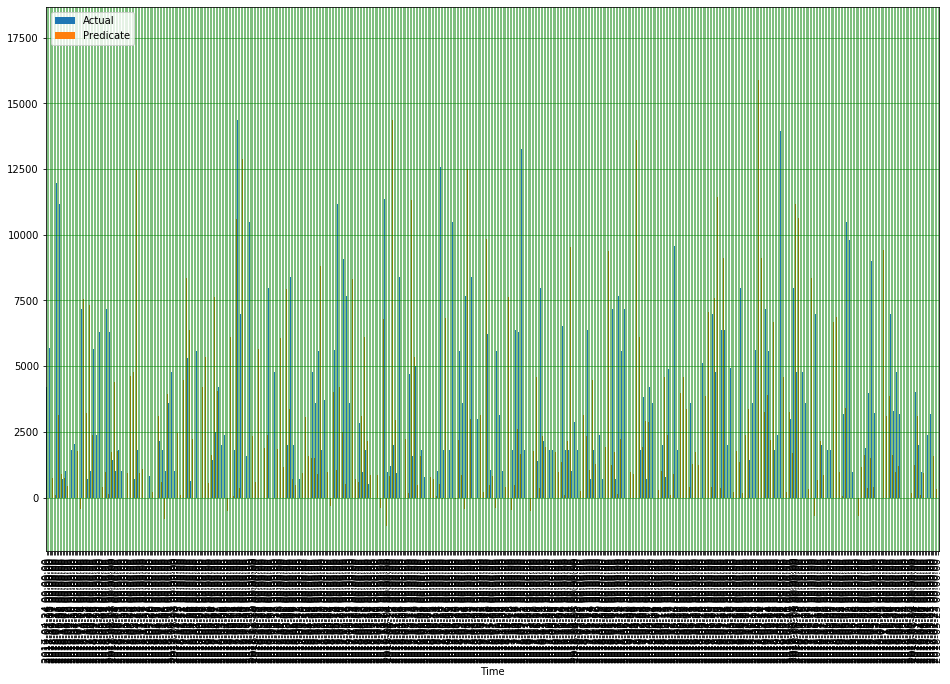

In [362]:
df_11.plot(kind='bar',figsize=(16,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()

In [363]:
#grab the intercept and coefficient
intercept =regression_model.intercept_[0]
coef=regression_model.coef_[0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

for cf in zip(X.columns,coef):
    print('The coefficient for {} is {:.2}'.format(cf[0],cf[1]))

The intercept for our model is 3.04e+03
----------------------------------------------------------------------------------------------------
The coefficient for const is 0.0
The coefficient for titlecount is 8.3e+01
The coefficient for amazontotalreviews is -3.1e+01
The coefficient for maxprice is -2.3e+03
The coefficient for amazontotalunits is 1.1e+03
The coefficient for maxlistprice is -3e+01
The coefficient for minamazonlistprice is -3.8e+02
The coefficient for minprice is 3.2e+02
The coefficient for bookscanreported is -2.5e+01
The coefficient for maxamazonlistprice is -3e+01
The coefficient for totalunits is 1.1e+03
The coefficient for maxamazonprice is 2e+03
The coefficient for amazonaveragerating is 4.3e+01
The coefficient for minlistprice is 3.6e+02
The coefficient for minamazonprice is 3.2e+02
The coefficient for soldunits is 1.4e+03
The coefficient for aapreported is -4.4
The coefficient for minbarnesandnobleprice is 5.3e+01
The coefficient for maxbarnesandnobleprice is 5.3e

In [263]:
df_6_AD.columns

Index(['Unnamed: 0', 'entity', 'formattype', 'fromdate', 'titlecount',
       'titles', 'todate', 'author', 'amazontotalreviews',
       'amazontotalrevenue', 'foundatamazon', 'maxprice', 'amazontotalunits',
       'totalrevenue', 'maxlistprice', 'minamazonlistprice', 'minprice',
       'bookscanreported', 'datepublished', 'maxamazonlistprice', 'totalunits',
       'maxamazonprice', 'amazonaveragerating', 'publishertype',
       'amazonsalesrevenue', 'amazoncategories', 'minlistprice',
       'minamazonprice', 'publisherparent', 'salesrevenue', 'formats',
       'soldunits', 'aapreported', 'minbarnesandnobleprice',
       'maxbarnesandnobleprice', 'pubtrackreported', 'amazonsoldunits'],
      dtype='object')

In [279]:
df_6_AD[['totalrevenue','amazontotalrevenue','maxprice','totalunits','amazonsalesrevenue','salesrevenue','soldunits','aapreported']]

,totalrevenue,amazontotalrevenue,maxprice,totalunits,amazonsalesrevenue,salesrevenue,soldunits,aapreported
0,0,0,0,6,0,0,6,1
1,702,702,702,7,702,702,7,1
2,4914,4914,702,7,4914,4914,7,1
3,4212,4212,702,6,4212,4212,6,1
4,702,702,702,1,702,702,1,1
5,4914,4914,702,7,4914,4914,7,1
6,4212,4212,702,6,4212,4212,6,1
7,0,0,702,0,0,0,0,1
8,2808,2808,702,4,2808,2808,4,1
9,8424,8424,702,12,8424,8424,12,1


<br>

<br>

<br>

### 5.Visulization

- 2.recommendation system
- 4.Simon & Schuster is a publisher, so we should concern what the audience change during time, For the same book, the buyer prefer print or audice
- 6.Which feature is more related to sales
- 7.One shot learning and meta learning using few data point to get more result
- 8.Sales change with time (months and years)

In [388]:
df_6_AD.columns

Index(['Unnamed: 0', 'entity', 'formattype', 'fromdate', 'titlecount',
       'titles', 'todate', 'author', 'amazontotalreviews',
       'amazontotalrevenue', 'foundatamazon', 'maxprice', 'amazontotalunits',
       'totalrevenue', 'maxlistprice', 'minamazonlistprice', 'minprice',
       'bookscanreported', 'datepublished', 'maxamazonlistprice', 'totalunits',
       'maxamazonprice', 'amazonaveragerating', 'publishertype',
       'amazonsalesrevenue', 'amazoncategories', 'minlistprice',
       'minamazonprice', 'publisherparent', 'salesrevenue', 'formats',
       'soldunits', 'aapreported', 'minbarnesandnobleprice',
       'maxbarnesandnobleprice', 'pubtrackreported', 'amazonsoldunits',
       'Time'],
      dtype='object')

Each type (print, audio,ebook) contribute how many total sales revenue 

In [366]:
gb_2 = df_6_AD.groupby(['formattype'])['salesrevenue'].sum()

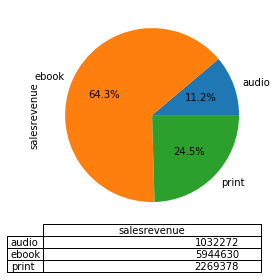

In [370]:
gb_2.plot(kind='pie',autopct='%1.1f%%',table=gb_2)

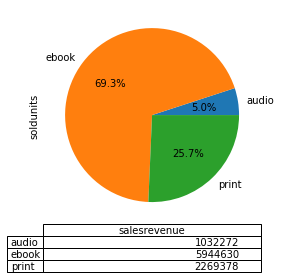

In [389]:
gb_3 = df_6_AD.groupby(['formattype'])['soldunits'].sum()
gb_3.plot(kind='pie',autopct='%1.1f%%',table=gb_2)

In [390]:
df_6_AD['Time'] = pd.to_datetime(df_6_AD['todate'],format='%Y%m%d')

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


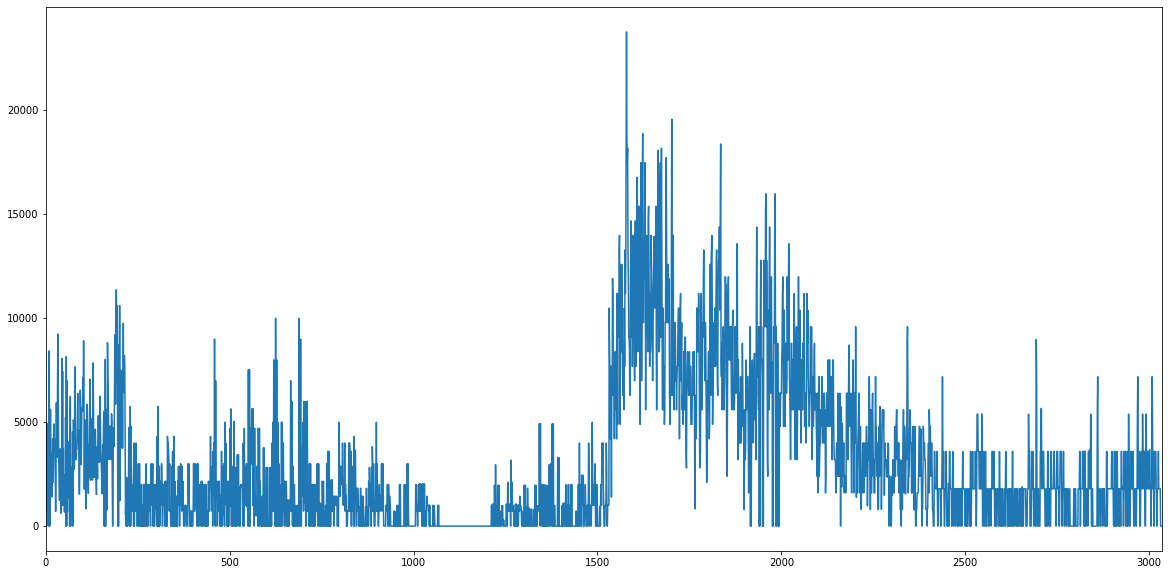

In [395]:
df_6_AD['salesrevenue'].plot(x=df_6_AD[['Time']],kind='line',figsize=(20,10))

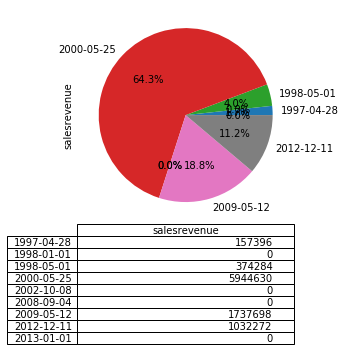

In [399]:
gb_3=df_6_AD.groupby("datepublished")["salesrevenue"].sum()
gb_3.plot(kind='pie',autopct='%1.1f%%',table=gb_3)

            Unnamed: 0  entity  fromdate  titlecount  titles  todate  author  \
formattype                                                                     
audio              846     846       846         846     846     846     846   
ebook              863     863       863         863     863     863     863   
print             1777    1777      1777        1777    1777    1777    1777   

            amazontotalreviews  amazontotalrevenue  foundatamazon  ...  \
formattype                                                         ...   
audio                      846                 846            846  ...   
ebook                      863                 863            863  ...   
print                     1777                1777           1777  ...   

            minamazonprice  publisherparent  salesrevenue  formats  soldunits  \
formattype                                                                      
audio                  846              846           846      846

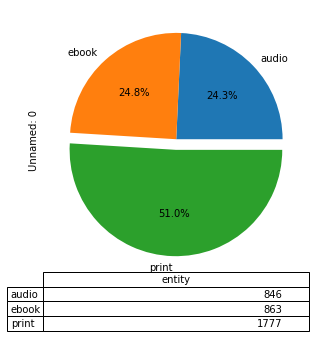

In [250]:

count_2 = df_6_WD.groupby("formattype").count()
print(count_2)
print(count_2.iloc[:,0])
print(count_2.index)

# using data total)arrests
count_2.iloc[:,0].plot(
    #count_1.iloc[:,0],
    # with the labels being officer names
    #labels=count_1.index,
    #title=count_1.iloc[:,1],
    kind='pie',
    table=count_2.iloc[:,1],
    # with no shadows
    #shadow=False,
    # with colors
    #colors=colors,
    # with one slide exploded out
    explode=(0, 0, 0.10),
    # with the start angle at 90%
    #startangle=90,
    # with the percent listed as a fraction
    autopct='%1.1f%%'
    #x=count_1.iloc[:,1],
)

# View the plot drop above
#plt.axis('equal')

# View the plot
plt.tight_layout()
plt.show()